### Assignment 2, Question 2
#### Devon Richtsmeier

### 2. Choose a KNN model for a multiclass classification using MNIST data. 

#### In this problem, we are again interested in looking at Modified National Institute of Standards and Technology (MNIST) dataset. To reiterate, the dataset set consists of thousands of 28x28 images of hand written numbers from 0 to 9. It can be useful to develop a model for number recognition from handwritten notes, forms, etc. as it would make the data input process for large amounts of such documents much more efficient, and take much less time than having to input the data by hand. Here, we are looking at reshaping the 28x28 images to single vectors with 784 elements in order to use more simple models. 

#### Specifically, in this problem, instead of invesigating a Logistic Regression for multiclass classification, we will be using a KNN model to see the differences. Of course there are 10 classes, the digits 0-9 that we would like to distinguish between based on the pixels values of 784 pixels.

#### Below we can see examples from the MNIST dataset of each of the handwritten digits.

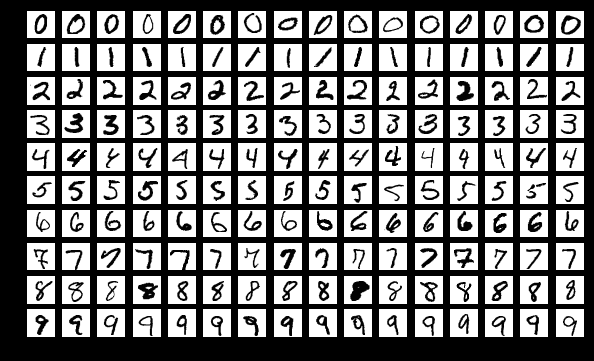
https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png

In [21]:
# Load the appropriate packages

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier  # KNeighbors classifier instead of the logistic regression
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from datetime import datetime

# Set the style for plots going forward to be a white background with a grid.
sns.set_style('whitegrid')

# Print when all packages are loaded and ready to continue.
print('Packages loaded.')

Packages loaded.


### a. Do the same steps as the above question 1 with KNN. 

#### Now, we again want to train the model to recognize various digits between 0 and 9, and we want to see how much noise our model can handle before its performance becomes unacceptable. This is because documents which we'd be potentially trying to read would need to be scanned in some manner, which could introduce noise, or the ink or lead could become smudged, making the digits less readable. So seeing how well our model performs with various levels of noise is important. Additionally, we will see what effect principal component analysis (PCA) has on our KNN classifier. PCA reinterprets the data set to find the combination of features that describe the most variation within the data, allowing you to use less components to have similar outcomes from the model. 

### Now we'll load the MNIST data from tensorflow, which is already separated into the the input and target sets for training and validation. We'll concatenate the two target sets to obtain a single target set. This is so we can define our training and validation sets later on with a specific percentage of the full data set.

In [22]:
# Get the MNIST data 
from tensorflow.keras.datasets import mnist

# Define the input and target sets for both and normalizing the input
(input_tr, target_tr), (input_va, target_va) = mnist.load_data()

# Reshape the data from images into vectors
input_tr = np.reshape(input_tr, (-1,784)) 
input_va = np.reshape(input_va, (-1,784))

print('The shape of the input training set is: ', np.shape(input_tr))
print('The shape of the input validation set is: ', np.shape(input_va))

# Combine the target training and validation sets
tarT = np.concatenate((target_tr, target_va))

print('The shape of the concatenated target training and validation set is: ', np.shape(tarT))

The shape of the input training set is:  (60000, 784)
The shape of the input validation set is:  (10000, 784)
The shape of the concatenated target training and validation set is:  (70000,)


#### Once we have the full target data set we need to add various levels of noise to our input set and then normalize. So we can define a number of levels of peak noise to multiply to a randomized array of values between 0 and 1 that are the same shapes as the initial training and validation sets. Then we can iterate through noise levels, apply it to our input set and fit the model at each level of noise. Then we'll calculate an accuracy score of our model between the predicted values and the target values. 

#### For this iteration we will be using all of the input features (pixels) to predict, i.e. we won't be using any PCA.

In [14]:
# Import datetime in order to time the various iterations through the loop

from datetime import datetime
# The various noise levels to add to the MNIST data
n_noise = np.array([0, 0.25, 0.5, 1, 1.5, 2, 3, 4.5, 10, 20, 30, 40, 50])

# Set the baseline noise arrays (not scaled by the n_noise values)
noise_train = np.random.rand(60000, 784)
noise_valid = np.random.rand(10000, 784)

# Initialize two arrays to hold the accuracy score for each level of n_noise (for training and validation)
acc_no_pca_tr = np.zeros(len(n_noise))
acc_no_pca_va = np.zeros(len(n_noise))

# For loop to loop through the n_noise values and fit the data with the KNN classifier
for c_idx, c_noise in enumerate(n_noise):
    
    # Scale the noise by the amount defined by c_noise
    noise_tr = noise_train * c_noise
    noise_va = noise_valid * c_noise
    
    # Set temporary variables in the loop to the baseline MNIST training and validation set and scale by dividing by 255
    inp_tr_temp = input_tr/255
    inp_va_temp = input_va/255
    
    # Add the noise to the MNIST data and normalize to the level of noise
    inp_tr_temp = (inp_tr_temp + noise_tr)/(1 + c_noise)
    inp_va_temp = (inp_va_temp + noise_va)/(1 + c_noise)
    
    # Combine the training and test sets
    inpT = np.concatenate((inp_tr_temp, inp_va_temp))
    
    # Print the noise level
    print('Noise level:', c_noise)
    
    # Split the data into training and test, 30% in the test set
    inp_tr, inp_va, tar_tr, tar_va = train_test_split(inpT, tarT, test_size=0.3, random_state=0)
    
    # Set up the KNN classifier: k = 10, p = 2.
    knn = KNeighborsClassifier(n_neighbors=10, p=2, n_jobs=1)
    
    # Start a timer
    start = datetime.now().timestamp()
    
    # Fit the data using the KNN
    knn.fit(inp_tr, tar_tr)  # fit the model with training set

    # Predict the training and validation sets
    pred_tr = knn.predict(inp_tr)
    pred_va = knn.predict(inp_va)
    
    # Find the accuracy score of the metric
    acc_no_pca_tr[c_idx] = metrics.accuracy_score(pred_tr, tar_tr)
    acc_no_pca_va[c_idx] = metrics.accuracy_score(pred_va, tar_va)
    
    # Print the time it took to complete
    print(f'Time to complete: {datetime.now().timestamp() - start:0.3f}')
    print()
    

Noise level: 0.0
Time to complete: 79.894

Noise level: 0.25
Time to complete: 78.543

Noise level: 0.5
Time to complete: 83.618

Noise level: 1.0
Time to complete: 78.897

Noise level: 1.5
Time to complete: 78.842

Noise level: 2.0
Time to complete: 81.099

Noise level: 3.0
Time to complete: 78.700

Noise level: 4.5
Time to complete: 79.687

Noise level: 10.0
Time to complete: 79.611

Noise level: 20.0
Time to complete: 78.318

Noise level: 30.0
Time to complete: 78.421

Noise level: 40.0
Time to complete: 79.106

Noise level: 50.0
Time to complete: 80.016



### Now we'll plot the accuracy score vs. the level of noise for our KNN classifier with no PCA used.

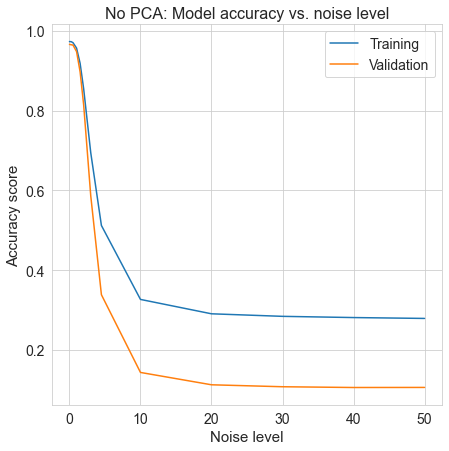

In [15]:
# Set up the accuracy vs. n_noise plot for no PCA
fig_no_pca = plt.figure(figsize=(7, 7))
plt.plot(n_noise, acc_no_pca_tr)
plt.plot(n_noise, acc_no_pca_va)
plt.title('No PCA: Model accuracy vs. noise level', fontsize=16)
plt.xlabel('Noise level', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend(['Training', 'Validation'], fontsize=14)
plt.show()

#### Similar to what we saw with the Logistic Regression model, we see a fairly large separation between the training and validation accuracy scores, likely due to overfitting. The difference is more pronounced than in the logistic regression model. Additionally, the accuracy is better initially, but suffers more as the noise increases compared to logistic regression.

### Now we'll again input the data into our KNN classifier at the different noise levels, but this time we'll use a fixed 100 principal components. 

In [16]:
# Initialize two arrays to hold the accuracy score for each level of n_noise, this time with PCA with 100 components
acc_with_pca100_tr = np.zeros(len(n_noise))
acc_with_pca100_va = np.zeros(len(n_noise))

# For loop to loop through the n_noise values and fit the data with the KNN classifier
for c_idx, c_noise in enumerate(n_noise):
    
    # Scale the noise by the amount defined by c_noise
    noise_tr = noise_train * c_noise
    noise_va = noise_valid * c_noise
    
    # Set temporary variables in the loop to the baseline MNIST training and validation set and scale appropriately
    inp_tr_temp = input_tr/255
    inp_va_temp = input_va/255
    
    # Add the noise to the MNIST data and normalize to the level of noise
    inp_tr_temp = (inp_tr_temp + noise_tr)/(1 + c_noise)
    inp_va_temp = (inp_va_temp + noise_va)/(1 + c_noise)
    
    # Combine the training and test sets
    inpT = np.concatenate((inp_tr_temp, inp_va_temp))
    
    # Print the noise level and shape of input set
    print('Noise level:', c_noise)
    
    # Split the data into training and test, 30% to test
    inp_tr, inp_va, tar_tr, tar_va = train_test_split(inpT, tarT, test_size=0.3, random_state=0)
    
    # Start a timer
    start = datetime.now().timestamp()
    
    # Initialize the PCA transformer with n_components = 100
    pca = PCA(n_components=100)

    # Fit the data to find 100 principal components
    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)
    
    # Check how long it took to run the PCA
    print(f'Time to complete PCA: {datetime.now().timestamp() - start:0.3f}')
    
    # Set up the KNN classifier: k = 10, p = 2.
    knn = KNeighborsClassifier(n_neighbors=10, p=2, n_jobs=1)
    
    # Fit the data with the KNN
    knn.fit(inp_tr_pca, tar_tr)  # fit the model with training set

    # Predict the training and validation sets
    pred_tr = knn.predict(inp_tr_pca)
    pred_va = knn.predict(inp_va_pca)
    
    # Find the accuracy score of the metric
    acc_with_pca100_tr[c_idx] = metrics.accuracy_score(pred_tr, tar_tr)
    acc_with_pca100_va[c_idx] = metrics.accuracy_score(pred_va, tar_va)
    
    # Print the time it took to complete
    print(f'Time to complete PCA and KNN: {datetime.now().timestamp() - start:0.3f}')
    print()

Noise level: 0.0
Time to complete PCA: 3.041
Time to complete PCA and KNN: 60.065

Noise level: 0.25
Time to complete PCA: 3.000
Time to complete PCA and KNN: 61.516

Noise level: 0.5
Time to complete PCA: 2.867
Time to complete PCA and KNN: 59.327

Noise level: 1.0
Time to complete PCA: 2.846
Time to complete PCA and KNN: 58.838

Noise level: 1.5
Time to complete PCA: 2.837
Time to complete PCA and KNN: 59.723

Noise level: 2.0
Time to complete PCA: 2.858
Time to complete PCA and KNN: 59.834

Noise level: 3.0
Time to complete PCA: 2.852
Time to complete PCA and KNN: 60.066

Noise level: 4.5
Time to complete PCA: 2.857
Time to complete PCA and KNN: 60.815

Noise level: 10.0
Time to complete PCA: 2.861
Time to complete PCA and KNN: 60.727

Noise level: 20.0
Time to complete PCA: 2.872
Time to complete PCA and KNN: 58.952

Noise level: 30.0
Time to complete PCA: 2.852
Time to complete PCA and KNN: 56.715

Noise level: 40.0
Time to complete PCA: 2.767
Time to complete PCA and KNN: 56.898


### Again we'll plot the accuracy score vs. the level of noise for 100 principal components.

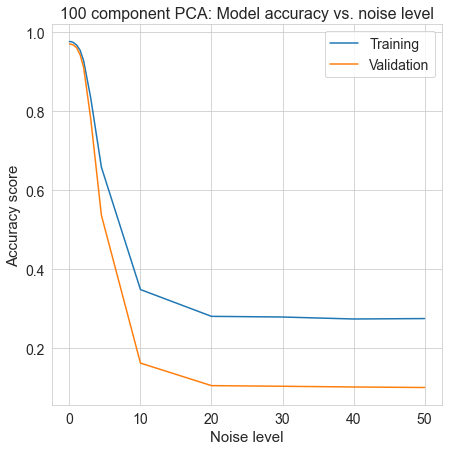

In [17]:
# Set up the accuracy vs. n_noise plot for no PCA
fig_with_pca100 = plt.figure(figsize=(7, 7))
plt.plot(n_noise, acc_with_pca100_tr)
plt.plot(n_noise, acc_with_pca100_va)
plt.title('100 component PCA: Model accuracy vs. noise level', fontsize=16)
plt.xlabel('Noise level', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend(['Training', 'Validation'], fontsize=14)
plt.show()

#### Here, with 100 principal components we see similar results in both accuracy and separation between the training and validation sets when compared with no PCA.

### Run one more time using 20 principal components.

In [18]:
# Initialize two arrays to hold the accuracy score for each level of n_noise, this time with PCA with 20 components
acc_with_pca20_tr = np.zeros(len(n_noise))
acc_with_pca20_va = np.zeros(len(n_noise))

# For loop to loop through the n_noise values and fit the data with the KNN classifier
for c_idx, c_noise in enumerate(n_noise):
    
    # Scale the noise by the amount defined by c_noise
    noise_tr = noise_train * c_noise
    noise_va = noise_valid * c_noise
    
    # Set temporary variables in the loop to the baseline MNIST training and validation set and scale appropriately
    inp_tr_temp = input_tr/255
    inp_va_temp = input_va/255
    
    # Add the noise to the MNIST data and normalize to the noise
    inp_tr_temp = (inp_tr_temp + noise_tr)/(1 + c_noise)
    inp_va_temp = (inp_va_temp + noise_va)/(1 + c_noise)
    
    # Combine the training and test sets
    inpT = np.concatenate((inp_tr_temp, inp_va_temp))
    
    # Print the noise level and shape of input set
    print('Noise level:', c_noise)
    
    # Split the data into training and test, 30% for the test set
    inp_tr, inp_va, tar_tr, tar_va = train_test_split(inpT, tarT, test_size=0.3, random_state=0)
    
    # Initialize the PCA transformer with n_components = 100
    pca = PCA(n_components=20)

    # Start a timer
    start = datetime.now().timestamp()
        
    # Fit the PCA 
    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)
    
    print(f'Time to complete PCA: {datetime.now().timestamp() - start:0.3f}')
    
    # Set up the KNN classifier: k = 10, p = 2. 
    knn = KNeighborsClassifier(n_neighbors=10, p=2, n_jobs=1)
    
    # Fit the data
    knn.fit(inp_tr_pca, tar_tr)  # fit the model with training set

    # Predict the training and validation sets
    pred_tr = knn.predict(inp_tr_pca)
    pred_va = knn.predict(inp_va_pca)
    
    # Find the accuracy score of the metric
    acc_with_pca20_tr[c_idx] = metrics.accuracy_score(pred_tr, tar_tr)
    acc_with_pca20_va[c_idx] = metrics.accuracy_score(pred_va, tar_va)
    
    # Print the time it took to complete
    print(f'Time to complete PCA and KNN: {datetime.now().timestamp() - start:0.3f}')
    print()

Noise level: 0.0
Time to complete PCA: 2.421
Time to complete PCA and KNN: 57.087

Noise level: 0.25
Time to complete PCA: 2.329
Time to complete PCA and KNN: 57.093

Noise level: 0.5
Time to complete PCA: 2.360
Time to complete PCA and KNN: 59.343

Noise level: 1.0
Time to complete PCA: 2.380
Time to complete PCA and KNN: 60.086

Noise level: 1.5
Time to complete PCA: 2.327
Time to complete PCA and KNN: 62.314

Noise level: 2.0
Time to complete PCA: 2.601
Time to complete PCA and KNN: 61.794

Noise level: 3.0
Time to complete PCA: 2.599
Time to complete PCA and KNN: 61.598

Noise level: 4.5
Time to complete PCA: 2.660
Time to complete PCA and KNN: 61.608

Noise level: 10.0
Time to complete PCA: 2.506
Time to complete PCA and KNN: 60.485

Noise level: 20.0
Time to complete PCA: 2.492
Time to complete PCA and KNN: 62.079

Noise level: 30.0
Time to complete PCA: 2.512
Time to complete PCA and KNN: 57.999

Noise level: 40.0
Time to complete PCA: 2.561
Time to complete PCA and KNN: 61.253


### Now, again plot the accuracy score vs. the level of noise for 20 principal components.

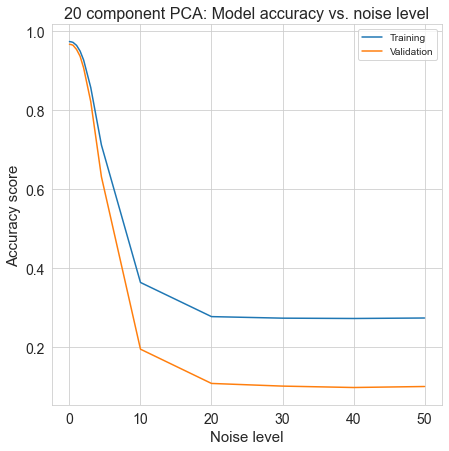

In [19]:
# Set up the accuracy vs. n_noise plot for no PCA
fig_with_pca20 = plt.figure(figsize=(7, 7))
plt.plot(n_noise, acc_with_pca20_tr)
plt.plot(n_noise, acc_with_pca20_va)
plt.title('20 component PCA: Model accuracy vs. noise level', fontsize=16)
plt.xlabel('Noise level', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend(['Training', 'Validation'])
plt.show()

#### Again, we see the same trend of separation between training and validation and little different in the accuracy for 20 principal components compared to 100 principal components. 

### However, we'll compare all three instances and see the differences in accuracy for both training and validation sets, and the difference between the two for each level of PCA, including no PCA.  

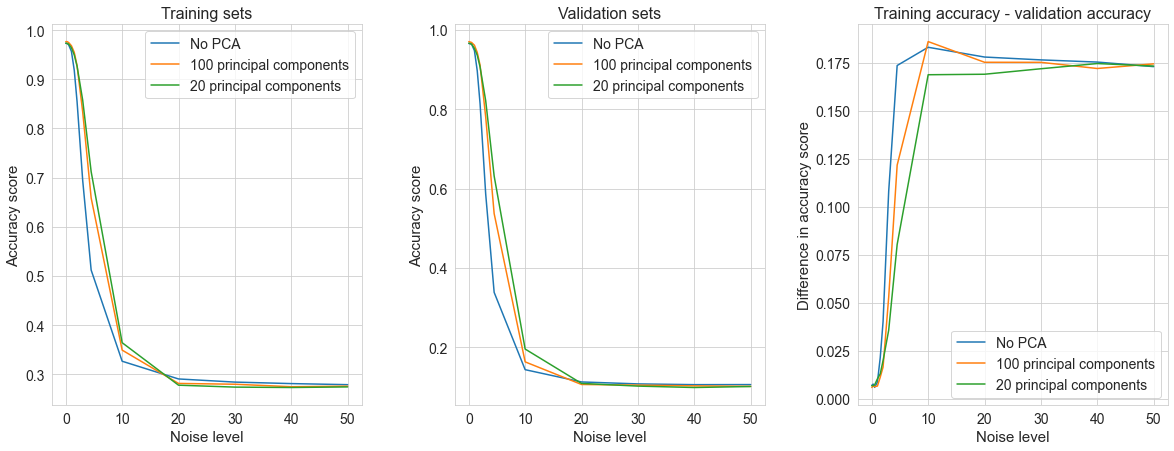

In [23]:
# Set up the figure with all 3 plots
fig_all, ax = plt.subplots(1, 3, figsize=(20, 7))

# Training sets
ax[0].plot(n_noise, acc_no_pca_tr)
ax[0].plot(n_noise, acc_with_pca100_tr)
ax[0].plot(n_noise, acc_with_pca20_tr)
ax[0].set_title('Training sets', fontsize=16)
ax[0].set_xlabel('Noise level', fontsize=15)
ax[0].set_ylabel('Accuracy score', fontsize=15)
ax[0].tick_params(labelsize=14)
ax[0].legend(['No PCA', '100 principal components', '20 principal components'], fontsize=14)

# Validation sets
ax[1].plot(n_noise, acc_no_pca_va)
ax[1].plot(n_noise, acc_with_pca100_va)
ax[1].plot(n_noise, acc_with_pca20_va)
ax[1].set_title('Validation sets', fontsize=16)
ax[1].set_xlabel('Noise level', fontsize=15)
ax[1].set_ylabel('Accuracy score', fontsize=15)
ax[1].tick_params(labelsize=14)
ax[1].legend(['No PCA', '100 principal components', '20 principal components'], fontsize=14)

# Differences between training and validation
ax[2].plot(n_noise, acc_no_pca_tr - acc_no_pca_va)
ax[2].plot(n_noise, acc_with_pca100_tr - acc_with_pca100_va)
ax[2].plot(n_noise, acc_with_pca20_tr - acc_with_pca20_va)
ax[2].set_title('Training accuracy - validation accuracy', fontsize=16)
ax[2].set_xlabel('Noise level', fontsize=15)
ax[2].set_ylabel('Difference in accuracy score', fontsize=15)
ax[2].tick_params(labelsize=14)
ax[2].legend(['No PCA', '100 principal components', '20 principal components'], fontsize=14)

plt.subplots_adjust(wspace=0.3)
plt.show()

#### With the KNN classifier there are less differences between the use of different principal components or no PCA. However, we see an increase in the accuracy of both the training and validation sets with fewer principal components used. However the difference between training and validation accuracy remains about the same, though gets smaller with less principal components as well.

#### The model is not very tolerant of noise either, but using PCA definitely speeds on the model fitting so would definitely be useful in this case. I think in the case of KNN, reducing the amount of features allows the model to better find the true nearest neighbors, whereas using all of the features could just introduce more noise into the problem.

### b. Which step is difficult?

### and

### c. Which n_component works better for KNN?

#### The most difficult step between the three options of no PCA, PCA with 100 components, and PCA with 20 components is no PCA at all. It took the longest time to find the compute the KNN classification at each noise step compared to the same noise step from the other two options. I believe this is due to the fact that the KNN classifier has more to consider when inputing all of the features because it takes all of them into account when determining the nearest neighbors. Using fewer principal components works better in this case because the extra features could be considered noise.

### d. If you wanted to choose a model (KNN or Logistic regression), which one would you choose?

#### Well, there are a number of things to consider between the two types and I don't know that it's super cut and dry which would be the best. If we're going for speed alone, logistic regression would be the obvious choice, as the time it takes to fit the data with the model is an order of magnitude lower in most cases. Logistic regression took between 0.3 and 13 s, whereas the fastest fitting with KNN was over 55 s in all cases, closer to 80 s with no PCA. 

In [ ]:
# Import the necessary packages that haven't been imported yet
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix


# The confusion matrix plotting function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    # Plot the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Set the format of numbers in the matrix (integer if normalized, a float with 2 decimal places otherwise)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# Compute the confusion matrix for no PCA
cnf_matrix = confusion_matrix(pred_va, tar_va)
np.set_printoptions(precision=2)

#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1', '2','3','4','5','6','7','8','9'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1', '2','3','4','5','6','7','8','9'], normalize=True,
                      title='Normalized confusion matrix')


# Accuracy calculation (sum diag / sum (all))
# print ("Accuracy (TR) = ", metrics.accuracy_score(inp_tr_pca, pred_tr))
# print ("Accuracy (VA) = ", metrics.accuracy_score(inp_va_pca, pred_va))

# Manually
print ("Accuracy = ", np.sum(np.diag(cnf_matrix))/np.sum(cnf_matrix))
# print ("Accuracy (VA) = ", metrics.accuracy_score(inp_va_pca, pred_va))